# Example 1 -- In_BTB MOF

In [1]:
### Dirty way to import the codes
import sys
import os
import subprocess
import glob
parent_dir = os.path.abspath('../../')
sys.path.append(parent_dir)

from build_mof import *
from write_mol import *
from equilibration import *
from free_energy import *
from utils import *


In [2]:
# Visualization Purpose
#!{sys.executable} -m pip install py3Dmol
#!{sys.executable} -m pip install nglview


In [3]:
import py3Dmol
from ase.io import read
from ase.visualize import view

import nglview as nv

def visualize_cif(cif_file):
    atoms = read(cif_file)
    view = nv.show_ase(atoms)
    view
    
def visualize_xyz(xyz_file):
    with open(xyz_file, 'r') as f:
        xyz_data = f.read()

    viewer = py3Dmol.view(width=200, height=200)
    viewer.addModel(xyz_data, "xyz")
    viewer.setStyle({"sphere": {}})
    viewer.zoomTo()
    return viewer.show()


In [4]:
# List the linker and nodes
!ls

3c_BTB.xyz       DMA.cif          pto-4c_In-3c_BTB
4c_In.xyz        example1.ipynb   runtime.log


In [5]:
visualize_xyz('3c_BTB.xyz')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
visualize_xyz('4c_In.xyz')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Now we generate MOFs

In [7]:
linker = '3c_BTB'
node = '4c_In'
topos='pto'
cation = 'DMA'
forcefield = 'UFF'
replication = '1x1x1' ## in practice, increase the replication or simply remove this to increase the box

out_dir = f'{topos}-{node}-{linker}'

In [8]:
## we make a directory to contain all the simulation files
os.makedirs(out_dir, exist_ok=True)

In [9]:
build_mof(node, linker, topos, forcefield, replication, out_dir)

>>> No edge building block for type (np.int64(0), np.int64(1)) in edge_bbs.
>>> == Min RMSD of (node type: 0, node bb: 3c_BTB): 2.25E-02
>>> Pre-location at node slot 0, (node type: 0, node bb: 3c_BTB), RMSD: 2.25E-02
>>> Pre-location at node slot 1, (node type: 0, node bb: 3c_BTB), RMSD: 2.25E-02
>>> Pre-location at node slot 2, (node type: 0, node bb: 3c_BTB), RMSD: 2.25E-02
>>> Pre-location at node slot 3, (node type: 0, node bb: 3c_BTB), RMSD: 2.25E-02
>>> Pre-location at node slot 4, (node type: 0, node bb: 3c_BTB), RMSD: 2.25E-02
>>> Pre-location at node slot 5, (node type: 0, node bb: 3c_BTB), RMSD: 2.25E-02
>>> Pre-location at node slot 6, (node type: 0, node bb: 3c_BTB), RMSD: 2.25E-02
>>> Pre-location at node slot 7, (node type: 0, node bb: 3c_BTB), RMSD: 2.25E-02
>>> == Min RMSD of (node type: 1, node bb: 4c_In): 3.94E-01
>>> Pre-location at node slot 8, (node type: 1, node bb: 4c_In), RMSD: 3.94E-01
>>> Pre-location at node slot 9, (node type: 1, node bb: 4c_In), RMSD: 3.94

############### Working on pto ###############
Description on the Topology
<bound method Topology.check_validity of Topology pto, (3,4)-cn, num edge types: 1>


>>> MESSAGE: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
>>> SUCCESS: True
>>> ITER: 55
>>> OBJ: 0.048
>>> Location at node slot 0, (node type: 0, node bb: 3c_BTB), RMSD: 7.25E-03
>>> Location at node slot 1, (node type: 0, node bb: 3c_BTB), RMSD: 8.76E-03
>>> Location at node slot 2, (node type: 0, node bb: 3c_BTB), RMSD: 6.11E-03
>>> Location at node slot 3, (node type: 0, node bb: 3c_BTB), RMSD: 8.06E-03
>>> Location at node slot 4, (node type: 0, node bb: 3c_BTB), RMSD: 9.68E-03
>>> Location at node slot 5, (node type: 0, node bb: 3c_BTB), RMSD: 8.15E-03
>>> Location at node slot 6, (node type: 0, node bb: 3c_BTB), RMSD: 9.02E-04
>>> Location at node slot 7, (node type: 0, node bb: 3c_BTB), RMSD: 2.52E-03
>>> Location at node slot 8, (node type: 1, node bb: 4c_In), RMSD: 5.12E-01
>>> Location at node slot 9, (node type: 1, node bb: 4c_In), RMSD: 2.65E-01
>>> Location at node slot 10, (node type: 1, node bb: 4c_In), RMSD: 5.09E-01
>>> Location at node slot 11, (node type: 1

Done! Check the cif and data files for further simulation


In [10]:
## Now the MOF files and parameter files are saved in the out_dir
!ls {out_dir}

DMA.txt                              emin_pto-4c_In-3c_BTB_DMA.cif
PE_pto-4c_In-3c_BTB.dat              hr
STRAIN_pto-4c_In-3c_BTB.dat          in.DMA
VOLUME.dat                           in.emin_pto-4c_In-3c_BTB
bonded                               in.pto-4c_In-3c_BTB
bonded_pto-4c_In-3c_BTB.param        lj
data.DMA                             log.deposit
data.emin_pto-4c_In-3c_BTB_DMA       log.lammps
data.emin_pto-4c_In-3c_BTB_DMA_fe    non_bonded_pto-4c_In-3c_BTB.param
data.pto-4c_In-3c_BTB                non_bonded_pto-4c_In-3c_BTB_lj.param
data.pto-4c_In-3c_BTB_new            pto-4c_In-3c_BTB.cif
emin_pto-4c_In-3c_BTB.param          q


/Users/jianmingmao/anaconda3/envs/mof-topology/lib/python3.13/pty.py:95: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [11]:
## Since we need cations, we create the files for cations too
## Running in notebook, we supply the cif of cations from the small molecule package

In [12]:
import shutil
shutil.copy(f'../../small_molecule/DMA.cif', '.')
!ls .

3c_BTB.xyz       DMA.cif          pto-4c_In-3c_BTB
4c_In.xyz        example1.ipynb   runtime.log


In [13]:
create_mol_file(cation, forcefield, out_dir)

Small molecule file for LAMMPS deposition has been created!


fatal: not a git repository (or any of the parent directories): .git


In [14]:
## Show the generated MOF structure
nv.show_file('pto-4c_In-3c_BTB/pto-4c_In-3c_BTB.cif')

NGLWidget()

## Structure relaxation

In [15]:
mof = out_dir # the same name
n_mol = 6
nvt = True
npt = True
equi_time = 50000
temp = 300
pressure = 0.0

In [16]:
write_equi_params(mof, out_dir, cation)

In [17]:
write_equi_input(mof, out_dir, nvt, npt, cation, n_mol, equi_time, temp, pressure)

Input for Equilibration has been generated.


In [18]:
lammps_path = os.getenv('LAMMPS_PATH')
print(lammps_path)

/Users/jianmingmao/Desktop/mof-topology-prediction/lammps-stable_23Jun2022/src/lmp_mpi


In [19]:
import os
import subprocess

if lammps_path is not None:
    try:
        prev_dir = os.getcwd()  # Save the previous directory
        os.chdir(out_dir)  # Change to the output directory
        if os.path.exists(f'data.emin_{mof}_{cation}'):
            print('Minization already done!')
        else:
            commands = f'{lammps_path} -in in.emin_{mof} -screen none'
            subprocess.run(commands, shell=True, check=True)
        lmp2cif(mof, cation)
    except subprocess.CalledProcessError as e:
        print(f"Error occurred while running LAMMPS: {e}")
    finally:
        os.chdir(prev_dir)  # Ensure we return to the original directory
else:
    print('Missing LAMMPS path. Please set the LAMMPS_PATH environment variable.')



Minization already done!
Converting emin_pto-4c_In-3c_BTB_DMA to CIF


In [20]:
## Show the minimized MOF structure
nv.show_file('pto-4c_In-3c_BTB/emin_pto-4c_In-3c_BTB_DMA.cif')

NGLWidget()

In [ ]:
!cat 

## We then run the free energy calculation
#### may take a long while, submit the job to compute node is recommended.

In [ ]:
nproc = 4
center = 7

In [ ]:
## Prepare all the parameter files for free energy calculation

In [ ]:
write_non_bonded_lj(mof, out_dir, cation)
write_non_bonded(mof, out_dir, cation)
write_bonded(mof,out_dir)
write_in_fe(mof, out_dir, cation, center, temp, pressure)

In [ ]:
lammps_path = os.getenv('LAMMPS_PATH')
prev_dir = os.getcwd()  # Save the previous directory

In [ ]:
## run the simulation in the output folder
os.chdir(out_dir)

In [ ]:
b_lam = [0.00000001]#, 0.0001, 0.001, 0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0,]  
l_lam = [0]#, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
q_lam = [0.00000001] #, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,]
    
try:
    sub_dirs = {
        "bonded": ("in.BONDED", b_lam),
        "lj": ("in.LJ", l_lam),
        "q": ("in.Q", q_lam),
        "hr": ("in.HR", None)
    }

    for sub_dir, (script, lambdas) in sub_dirs.items():
        sub_dir_path = os.path.join(os.path.join(prev_dir, out_dir), sub_dir)
        if os.path.exists(sub_dir_path):
            os.chdir(sub_dir_path)  # Change to the subdirectory
            print(f"Running {script} in {sub_dir_path}")

            if lambdas is not None:
                for lam in lambdas:
                    if os.path.exists(glob.glob(f'*{lam}*lmp')):
                        print(f'Completed on {lam}!')
                    else:
                        command = f'mpirun -np {nproc} {lammps_path} -in {script} -var lambda {lam} -screen none'
                        print(f"Executing: {command}")
                        subprocess.run(command, shell=True, check=True)
            else:
                    # For "hr" (no lambda needed)
                if os.path.exists('done.dat'):
                    print(f'Completed!')
                else:
                    command = f'mpirun -np {nproc} {lammps_path} -in {script} -screen none'
                    print(f"Executing: {command}")
                    subprocess.run(command, shell=True, check=True)

        else:
            print(f"Skipping {sub_dir}: directory not found.")
finally:
    os.chdir(prev_dir)
    

## Finally we integrate the results

The original paper uses a different error estimation approach (see SI in the paper), while here we use 5-fold block avegraing for the integrand. The statistics are quite comparable in both methods. While in the paper, the tool from https://github.com/ATB-UQ/trapz_errors/tree/master is used to propargate the uncertainties more rigorously considering the truncation error at each interval. In the notebook, the uncertainty propargation here in the notebook produces more optimistic using the following equation for a trapezoidal integration.

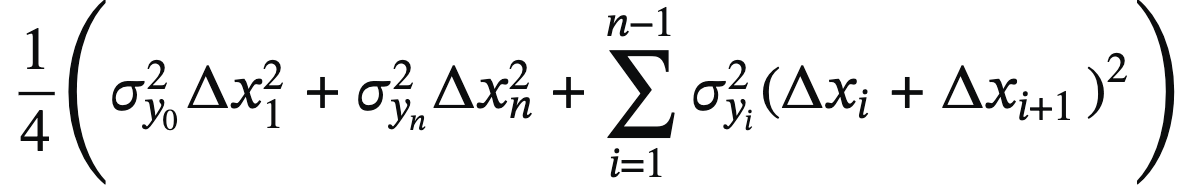

In [23]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.constants as sc
import lammpsio
from collections import Counter


In [24]:
mpl.rcParams['figure.dpi'] = 100

In [25]:
def block_averaging(arr, num_blocks=5):
    n = len(arr)
    block_size = n // num_blocks
    
    means = []
    for i in range(num_blocks):
        start = i * block_size
        end = (i + 1) * block_size
        block = arr[start:end]
        means.append(np.mean(block))
    
    mean_of_means = np.mean(means)
    std_of_means = np.std(means)
    
    return mean_of_means, std_of_means


In [26]:
'''
Free energies of crystals computed using Einstein crystal with fixed center of mass and differing spring constants
https://pubs.aip.org/aip/jcp/article/154/16/164509/317479/Free-energies-of-crystals-computed-using-Einstein
'''
def einstein(out_dir, force_k, volume_file, T, fu):
    kb = sc.value('Boltzmann constant') # kb in SI base units
    kb_kcal = sc.value('Boltzmann constant in eV/K') * 23.06054 # kb in kcal / mol K
    mu = sc.value('atomic mass constant')
    hbar = sc.h / (2 * sc.pi)
    Na = sc.value('Avogadro constant') # Avagadro's number
    
    with open(f'{out_dir}/{volume_file}', 'r') as file:
        content = file.read() 
    parts = content.split(':')
    volume = float(parts[1].strip()) 
    
    data = lammpsio.DataFile(f'{out_dir}/data.{out_dir}', atom_style='full')
    mol_data = data.read()
    type_ids = mol_data.typeid
    atom_masses = mol_data.mass
    
    F_harm = 0.0
    total_mass = 0.0
    com_correction_data = []

    atom_counts = {}
    atom_total_masses = {}


    
    for atom_type, mass in zip(type_ids, atom_masses):
        if atom_type in atom_counts:
            atom_counts[atom_type] += 1
            atom_total_masses[atom_type] += mass
        else:
            atom_counts[atom_type] = 1
            atom_total_masses[atom_type] = mass
    
    for atom_type in sorted(atom_counts.keys()):
        com_correction_data.append((atom_counts[atom_type], atom_total_masses[atom_type], force_k))

    for num_type, mass, force_k in com_correction_data:
        total_mass += mass            
        force_k_SI = force_k * 4184 * (1.0/Na) * (1.0e20) # convert force_k to SI units [J/m^2]
        single_mass = mass/num_type
        omega = np.sqrt((force_k_SI)/(single_mass*mu)) # frequency in Hz
        F_harm += 3 * num_type * kb_kcal * T * np.log((hbar*omega)/(kb*T)) # sum over each atom, the summand in the same within each type, output in kcal/mol
    
    F_harm = F_harm/fu
    
    mass_term = 0.0
    total_mass_squared = total_mass**2

    for num_type, mass, force_k in com_correction_data:
        single_mass = mass/num_type
        mass_term += (num_type * (single_mass**2))/(total_mass_squared * force_k)

    F_cmco = ((1.5 * kb_kcal * T) * np.log((2 * np.pi * kb_kcal * T) * mass_term) + (kb_kcal * T * np.log(1/volume)))/fu 
    ## we consider the whole MOF cell is a molecule and thus we have 1/volume
    
    return F_harm, F_cmco

In [27]:
def compute_dg(out_dir, part):
    if part == 'hr':
        forward = np.loadtxt(f'{out_dir}/{part}/forward.dat', comments=('@', '#'))
        backward = np.loadtxt(f'{out_dir}/{part}/backward.dat', comments=('@', '#'))

        forward_int = np.trapezoid(forward[:,1], forward[:,0])
        backward_int = np.trapezoid(backward[:,1], backward[:,0])
        integral = (forward_int - backward_int)/2
        error_integral = (forward_int + backward_int)/2 # dissipation heat instead

        results={'forward': forward_int, 'backward': backward_int, 'ave': integral, 'dissipation': error_integral}
        
        plt.plot(forward[:,1]/max(forward[:,1]), forward[:,0], color='#3288bd',alpha=0.5, linestyle='--', label='forward')
        plt.plot(backward[:,1]/max(backward[:,1]), backward[:,0], color='#5e4fa2',alpha=0.5, linestyle='--', label='backward')
        
        plt.ylabel(r'$\partial U/\partial \lambda$(kcal/mol/cell)', fontsize=12)
        plt.xlabel(r'$\lambda$', fontsize=12)
        plt.tick_params(labelsize=10)
        plt.legend()
        
    else:
        results = {'lambda': [], 'du/dλ': [], 'error': []}
        for file in glob.glob(f'{out_dir}/{part}/*lmp'):
            if os.path.isfile(file):
                filename = os.path.basename(file)
                lam = float(filename.split('_')[1].split('.lmp')[0])
                data = np.loadtxt(file, comments=('@', '#'))
                mean, err = block_averaging(data[:,1])
                results['lambda'].append(lam)
                results['du/dλ'].append(mean)
                results['error'].append(err)
        
        sorted_indices = np.argsort(results['lambda'])
        results = {key: np.array(value)[sorted_indices].tolist() for key, value in results.items()}
        lambda_values = np.array(results['lambda'])
        du_dl_values = np.array(results['du/dλ'])
        error_values = np.array(results['error'])
    
        # Integral calculation using the trapezoidal rule
        integral = np.trapezoid(du_dl_values, lambda_values)
    
        # Error propagation in the integral
        # Step size (h) is the difference between consecutive lambda values
        h = np.diff(lambda_values)
        h = np.diff(lambda_values)
        error_integral = 0.5 * np.sqrt(
            error_values[0]**2 * h[0]**2 +
            error_values[-1]**2 * h[-1]**2 +
            np.sum(error_values[1:-1]**2 * (h[:-1] + h[1:])**2)
        )
    
        plt.errorbar(results['lambda'], results['du/dλ'], yerr = results['error'],capsize=5, color='#3288bd', marker='o', linestyle='--', label=part)
        plt.ylabel(r'$\partial U/\partial \lambda$(kcal/mol/cell)', fontsize=12)
        plt.xlabel(r'$\lambda$', fontsize=12)
        plt.tick_params(labelsize=10)
        plt.legend()
    
    return results, integral, error_integral

In [28]:
out_dir = 'pto-4c_In-3c_BTB'

5486.283823060163 0.8138165473785927


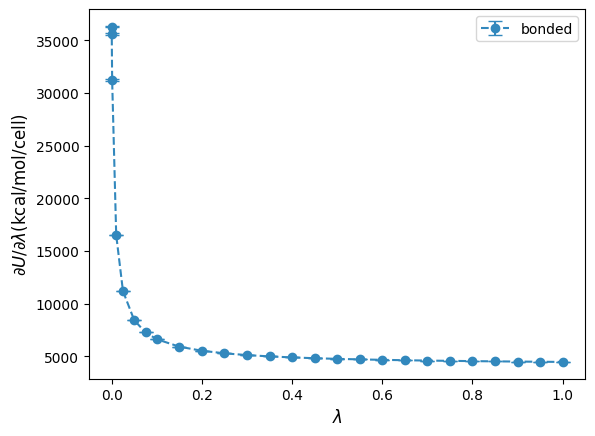

In [29]:
results_bonded, integral_bonded, error_integral_bonded = compute_dg(out_dir, 'bonded')
print(integral_bonded, error_integral_bonded)

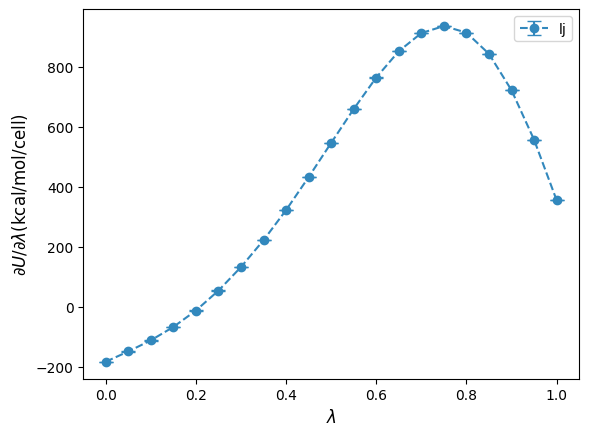

In [30]:
results_lj, integral_lj, error_integral_lj  = compute_dg(out_dir, 'lj')

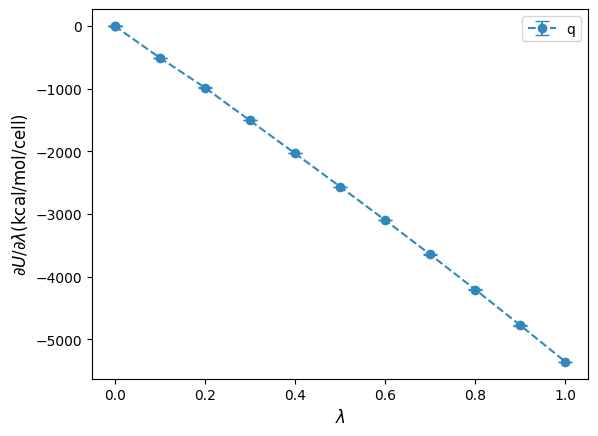

In [31]:
results_q, integral_q, error_integral_q = compute_dg(out_dir, 'q')

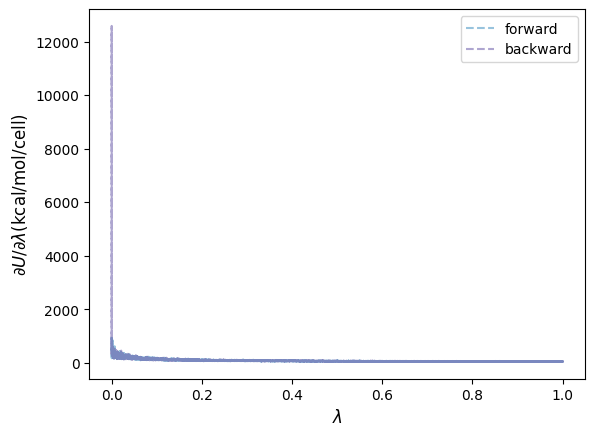

In [32]:
results_hr, integral_hr, error_integral_hr = compute_dg(out_dir, 'hr')

In [36]:
## This outputs the free energy of Einstein crystal and center of mass correction
fu = 456 # the number of atoms or formula unit, here is the atom number in this MOF
F_harm, F_cor = einstein(out_dir, 10, 'VOLUME.dat', 300, fu)

In [37]:
dG = (integral_bonded + integral_lj + integral_q - integral_hr)/fu + F_harm + F_cor
dG_err = np.sqrt(error_integral_bonded**2+error_integral_lj**2+error_integral_q**2)/fu


In [38]:
print(f'The final free energy is {dG:.3f} ± {dG_err:.3f}')

The final free energy is 6.726 ± 0.002


In [39]:
print('The results from the paper is 6.95 ± 0.44')

The results from the paper is 6.95 ± 0.44
